Enter the number of circles (excluding the center one): 60


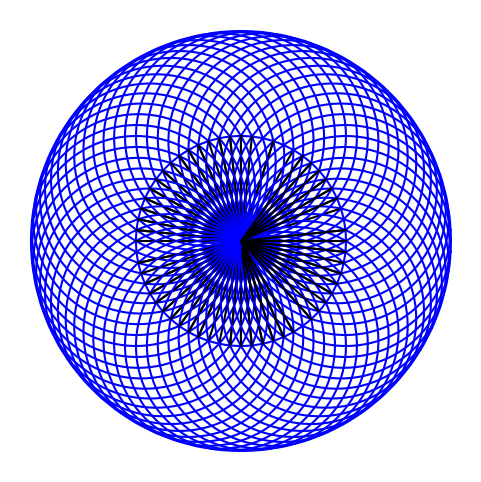

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def draw_circle(ax, center, radius, color='blue'):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    ax.plot(x, y, color=color)

def circle_intersection(center1, center2, radius):
    c1_center = np.array(center1)
    c2_center = np.array(center2)
    d = np.linalg.norm(c1_center - c2_center)
    if d > radius * 2 or d < abs(radius):
        return None
    a = (radius**2 - radius**2 + d**2) / (2 * d)
    h = np.sqrt(radius**2 - a**2)
    p2 = c1_center + a * (c2_center - c1_center) / d
    x3 = p2[0] + h * (c2_center[1] - c1_center[1]) / d
    y3 = p2[1] - h * (c2_center[0] - c1_center[0]) / d
    x4 = p2[0] - h * (c2_center[1] - c1_center[1]) / d
    y4 = p2[1] + h * (c2_center[0] - c1_center[0]) / d
    return np.array([[x3, y3], [x4, y4]])

def draw_flower_pattern(num_circles, radius):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    ax.axis('off')

    # Center circle
    draw_circle(ax, (0, 0), radius)

    # Calculate the angle between each circle
    angle_between_circles = 2 * np.pi / num_circles

    # Calculate the distance of outer circles' centers from the center of the central circle
    distance_outer = radius

    # Draw circles and connect intersection points
    for i in range(num_circles):
        angle = i * angle_between_circles
        x = distance_outer * np.cos(angle)
        y = distance_outer * np.sin(angle)
        draw_circle(ax, (x, y), radius)
        intersection_points = circle_intersection((0, 0), (x, y), radius)
        if intersection_points is not None:
            ax.plot([intersection_points[0][0], 0, intersection_points[1][0]],
                    [intersection_points[0][1], 0, intersection_points[1][1]], color='black')

# Input number of circles and parameters
num_circles = int(input("Enter the number of circles (excluding the center one): "))
radius = 1

# Draw flower pattern
draw_flower_pattern(num_circles, radius)
plt.show()
